In [1]:
!git clone https://github.com/SmallLion/Python-Projects.git

#importing the dataset from the github repository

fatal: destination path 'Python-Projects' already exists and is not an empty directory.


# Loading the Dataset

Below is the code to import the required packages through which we can perform data preprocessing on the text data. As this data is based on text, therefore, we would be applying some concepts of Natural Language Processing. 

In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Muhammad
[nltk_data]     Waleed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
#reading the dataset using the method of read_csv through pandas library
df = pd.read_csv("Python-Projects/Spam-detection/spam.csv", encoding = 'latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ã_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
#passing the required columns v1 an v2, so that they can only be used in further process.
# the v1 column contains the target values and v2 column as input values.
df = df[['v1','v2']]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
enc = LabelEncoder() #creating an object of LabelEncoder so that we can apply transformation on our text data
df['v1'] = enc.fit_transform(  df['v1']) #using the fit_transform method to convert the labels from string to numbers
classes = {index: label for index, label in enumerate(enc.classes_)} #putting the labelled classes in a "classes" variable

C:\Users\Muhammad Waleed\AppData\Local\Temp\ipykernel_7792\204087397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v1'] = enc.fit_transform(  df['v1']) #using the fit_transform method to convert the labels from string to numbers


In [7]:
classes

{0: 'ham', 1: 'spam'}

In [8]:

def GetText(text):
    ps = PorterStemmer() #creating an object of porterstemer through which we can apply stemming (converting words on its root)
    text = text.lower() #converting all words into lower cases
    #using the sub method to clean our data
    text = re.sub(r'(http|https)://[^\s]*', 'httpaddr', text) #replacing http address to the word 'http'
    text = re.sub(r'[0-9+]','number',text) #replacing numbers to the word 'number'
    text = re.sub(r'[$]+', 'dollar', text) #replacing dollar signs to the word 'dollar'
    text = re.sub(r'<[^<>]+>', ' ', text) #replacing unusual signs
    text = re.sub(r'[^\s]+@[^\s]+', 'emailaddr', text) #converting email address to the word 'emailaddr'

    words = word_tokenize(text) #passing our cleaned text into the function word_tokenize to create tokens
    for i in range(len(words)):
       words[i] = re.sub(r'[^a-zA-Z0-9]', '', words[i]) 
       words[i] = ps.stem(words[i]) #applying stemming to the words one by one and saving them in the original list
    words = [word for word in words if len(word) >= 1] #now creating the list of words and removing the words from the list which are 
    return words #returning the words

In [18]:
def ProcessVocab(text, n):
    vocab = {} #creating an emtpy dictionary to store values in the pair of key and value
    for i in range(len(text)): #creating a loop to iterate with respect to the numebr of texts
        text[i] = GetText(text[i]) #passing each text in the respective index one by one in the GetText function so that they can be cleaned
        for word in text[i]: #getting each word from the text 
            if word in vocab.keys():
                vocab[word] += 1
            else:
                vocab[word] = 1
        #with the help of this loop we are adding assigning their frequency number to each unique word in the list of texts 
    vocab = sorted(vocab.items(), key = lambda x: x[1], reverse = True) #sorting those words with respect to their numbers
    vocab = list(map( lambda x:x[0]  , vocab[0: n])) #converting the vocab ito list
    vocab = {index: word for index, word in enumerate(vocab)} #now reversing the list and words
    
    return vocab #returning the vocab

In [19]:
ProcessVocab(df['v2'].to_list(), 10000) #displaying the list of vocab. In the function, we are passing two parameters: the texts and vocab limit. 

{0: 'i',
 1: 'to',
 2: 'you',
 3: 'a',
 4: 'the',
 5: 'number',
 6: 'u',
 7: 'and',
 8: 'it',
 9: 'is',
 10: 'in',
 11: 'me',
 12: 'my',
 13: 'for',
 14: 'your',
 15: 'call',
 16: 'have',
 17: 'do',
 18: 'that',
 19: 'of',
 20: 's',
 21: 'on',
 22: 'are',
 23: 'now',
 24: 'so',
 25: 'go',
 26: 'get',
 27: 'not',
 28: 'but',
 29: 'be',
 30: 'or',
 31: 'm',
 32: 'can',
 33: 'at',
 34: 'numbernumbernumb',
 35: 'we',
 36: 'will',
 37: 'if',
 38: 'ur',
 39: 'with',
 40: 'numbernumbernumbernumbernumbernumbernumbernumbernumbernumbernumb',
 41: 'nt',
 42: 'just',
 43: 'no',
 44: 'thi',
 45: 'how',
 46: 'gt',
 47: 'lt',
 48: 'up',
 49: 'what',
 50: 'come',
 51: 'when',
 52: 'ok',
 53: 'from',
 54: 'free',
 55: 'know',
 56: 'all',
 57: 'out',
 58: 'numbernumbernumbernumb',
 59: 'numbernumbernumbernumbernumb',
 60: 'like',
 61: 'got',
 62: 'love',
 63: 'day',
 64: 'time',
 65: 'wa',
 66: 'want',
 67: 'good',
 68: 'then',
 69: 'll',
 70: 'there',
 71: 'he',
 72: 'text',
 73: 'am',
 74: 'onli',
 75

In [20]:
def Key(data, value):
    for k, v in data.items(): #iterating the kay,value pair from the data
        if v == value: #returning the key of the value if it exists in the data dictionary
            return k

In [21]:
def getIndices(text, vocab):
    indexes = set() #creating a data structure of set. To add unique values in the lsit
    for w in text: #iterating words from the text one by one
        if w in vocab.values(): #checking if the word exists in the vocab library
            indexes.add(Key(vocab, w)) #if yes, then we will get its key from the KEY function, by passing the vocab and the respective word
            
    return indexes #returning the indexes
            

In [22]:
def CreateColumns(indexes, n):
    array = np.zeros(n) #creating an array containing entire zero values with the length 'n'.
    for i in indexes:array[i] = 1 #putting the value 1 against the respective indexes, where all words acts as a feature. 
    return array #returning the columns


In [23]:
vocab_length =10000 #creating the vocab upto 10000 in length

In [24]:
vocab = ProcessVocab(df['v2'].to_list(), vocab_length) #passing the input text data and vocab length to process the text data


In [56]:
text = df['v2'].to_list() #converting our text data into list
text = list(map(lambda x: GetText(x), text))# now passing the list into the get text function and in return converting the output into a list

In [57]:
xdf = list(map(lambda x: CreateColumns(getIndices(x, vocab), vocab_length), text)) #passing the vocab and vocab length, along with the text in the get indeices function then passing the returned data 
# into the create column functions so that they can be converted into list
xdf = pd.DataFrame(np.array(xdf).astype(np.int16)) #now converting the columns created into dataframe with integer base 16 datatype

In [58]:
Y = df['v1'].iloc[np.append(df[df['v1']  == 0].index[:100], 
          df[df['v1']  == 1].index[:100]
          )]
# now adding saving the processed target values in the Y variables. To save time, we are just selecting 100 samples from each class

In [59]:
X = xdf.iloc[df['v1'].iloc[np.append(df[df['v1']  == 0].index[:100], 
          df[df['v1']  == 1].index[:100]
          )] , 
       : 
       ]
# now adding saving the processed input  values in the X  variables. To save time, we are just selecting 100 samples from each class

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10) #creating an object of PCA (Principal Component Analysis) n_components means in how much columns we need to converge our actual X data

In [61]:
X = pca.fit_transform(X) # wtih the help of fit_transform function, we are converging all the information of the dataset in to 10 columsn, where in original we have 10,000 columns

In [62]:
for i in range(len(X)):
  
  for j in range(5):
    index = np.random.randint(0,X.shape[1]) #applying some noise in the dataset 
    X[i,index] = np.random.randn(1)

# Data Modeling

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
X.shape

(200, 10)

In [65]:
Y.value_counts()

0    100
1    100
Name: v1, dtype: int64

In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = .30, random_state = 0) #splitting the X,Y data into train and test size with the ratio .30. Which in actual is 30%

In [67]:
model = GaussianNB() #creating an object of GaussianNb model with its default parameters
model.fit(xtrain, ytrain) #fitting/training the naive bayes model on Xtrain and ytrtain data

GaussianNB()

In [68]:
from sklearn.metrics import accuracy_score  #to calculate accuracy, we are importing accuracy_score evaluate the performance of out model
score = accuracy_score(ytest, model.predict(xtest)) #passing the xtest data to get the predicted outputs/classes and then passing the real output and predicted output to calcualte the accuracy
print("Accuracy_score: {} %".format(score*100)) #displaying the accuracy

Accuracy_score: 70.0 %


## SVMNB

In [69]:
def GetDistance(i, j,data):
  submission = np.sum(data.iloc[i,:] - data.iloc[j,:]) ** 2
  sub = np.sqrt(submission)
  return sub


distance = {} #empty dictionary to save distances in key:value pair
#creating the SVMNB model
def SVMNB(X, Y, V, M):
  X = pd.DataFrame(X) #creating X data into dataframe for a safe side
  Y = np.array(Y) #converting Y data into an array
  V_index = [] #an empty variable to save indexs
  for i in range(M): #looping from 0 to M
    for j in range(M): #looping from 0 to M
      if i != j: #if the value of i is not equal to j
        distance[f'{i},{j}'] = GetDistance(i,j,X) #then we will pass these parameters (i,j,X) X is the data in the get distance function and then we will save the distance inthe distance distionary as a key/value pair
  for i in range(M): #looping from value 0 to M
    Min = 0.0 
    NearestNeighbour = i 
    for j in range(M): #looping from value 0 to M
      if i != j:#if the value of i is not equal to j
        if Min > float(distance[f'{i},{j}']): #check if the minimum value assigned about in this cell on line 20 is greater then the distance of index i and j 
          Min = distance[f'{i},{j}'] #if min is greater, then we will assign it to the respective distance value of i and j 
          NearestNeighbour = j  #assigning the j value as the nearest neighbour
  for i in range(M): #looping from value 0 to M
    if Y[i] == V[i]:  #if the predicted ith value of Y and V is equal
      V_index.append(i) #append the i value into V_index 
  return V_index, NearestNeighbour #returning the indexes and nearestneighbour

In [70]:
V, _ = SVMNB(X, Y, model.predict(X), len(X)) #calling the SVMNB function by passing the xdata, ydata, predicted outputs and length of X

In [71]:
model = GaussianNB() #again creating an object of GaussianNb model with its default parameters
model.fit(pd.DataFrame(X).iloc[np.unique(V),:],
          Y.reset_index(drop=True)[np.unique(V)]) #fitting the model with new index values received from the above SVMNB Function

GaussianNB()

In [72]:
from sklearn.metrics import accuracy_score #to calculate accuracy, we are importing accuracy_score evaluate the performance of out model
score = accuracy_score(  Y.reset_index(drop=True)[np.unique(V)], model.predict(pd.DataFrame(X).iloc[np.unique(V),:]))
print("Accuracy_score: {} %".format(score*100))

Accuracy_score: 94.83870967741936 %


In [73]:
from sklearn.metrics import classification_report #to calculate classification report, we are importing accuracy score evaluate the overall performance of out model
print(classification_report(  Y.reset_index(drop=True)[np.unique(V)], model.predict(pd.DataFrame(X).iloc[np.unique(V),:]))) # creating a classification report  by passing the real and predicted values 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        80
           1       0.97      0.92      0.95        75

    accuracy                           0.95       155
   macro avg       0.95      0.95      0.95       155
weighted avg       0.95      0.95      0.95       155



In [74]:
Y.reset_index(drop=True)[np.unique(V)].value_counts() #displaying the count of samples with respect to each class

0    80
1    75
Name: v1, dtype: int64

## Testing

This is the testing part, where we are selecting the data from in between then them testing them out.
- in the for loop, we are iterating indexes from a certain index range.
- then we are select the text in line 2 of the corresponding index value
- in line 3 we are converting the text into columns through create column function
- in line 7-8, we are adding some noise in the dataset 
- in line 9, we are applying PCA to converge the information from 10,000 columns into 10 columns and then passing into the model to for prediction

In [75]:
for i in range(400,600):
  TEXT = df.iloc[i,1]
  xdf = CreateColumns(getIndices(TEXT, vocab), vocab_length)
  for i in range(len(X)):
    
    for j in range(5):
      index = np.random.randint(0,len(xdf))
      xdf[index] = np.random.randn(1)
  print(model.predict(pca.transform([xdf])))

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]


In [76]:
TEXT = 'Ok lar... Joking wif u oni...'
xdf = CreateColumns(getIndices(TEXT, vocab), vocab_length)
xdf = pca.transform([xdf])
for i in range(len(X)):
  for j in range(5):
    index = np.random.randint(0,len(xdf))
    xdf[index] = np.random.randn(1)
model.predict(xdf)

array([0])

In [77]:
TEXT = "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Ã¥Â£1.50 to rcv"
xdf = CreateColumns(getIndices(TEXT, vocab), vocab_length)
xdf = pca.transform([xdf])
for i in range(len(X)):
  for j in range(5):
    index = np.random.randint(0,len(xdf))
    xdf[index] = np.random.randn(1)
model.predict(xdf)

array([0])

In [78]:
TEXT = "Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"
xdf = CreateColumns(getIndices(TEXT, vocab), vocab_length)
xdf = pca.transform([xdf])
for i in range(len(X)):
  for j in range(5):
    index = np.random.randint(0,len(xdf))
    xdf[index] = np.random.randn(1)
model.predict(xdf)

array([0])

In [79]:
TEXT = "Nah I don't think he goes to usf, he lives around here though"
xdf = CreateColumns(getIndices(TEXT, vocab), vocab_length)
xdf = pca.transform([xdf])
for i in range(len(X)):
  for j in range(5):
    index = np.random.randint(0,len(xdf))
    xdf[index] = np.random.randn(1)
model.predict(xdf)

array([1])

In [80]:
df.iloc[:10,:]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [81]:
#set actual labels and predicted labels and pass through confusion matrix and saved in a variable
conf_matrix = confusion_matrix(y_true= Y.reset_index(drop=True)[np.unique(V)], y_pred=model.predict(pd.DataFrame(X).iloc[np.unique(V),:]))

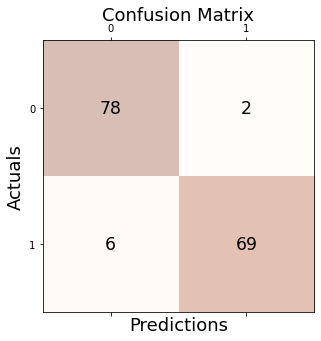

In [82]:
#passing above variable in which results of confusion matrix are save and displaying the confusion matrix through plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

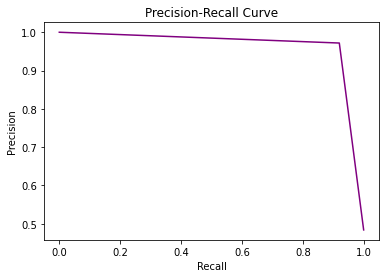

In [84]:
precision, recall, thresholds = precision_recall_curve(Y.reset_index(drop=True)[np.unique(V)],model.predict(pd.DataFrame(X).iloc[np.unique(V),:]))

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()